In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def normSample2D(x, y, var, N):
    X = np.random.normal(loc=x, scale=var, size=N)
    Y = np.random.normal(loc=y, scale=var, size=N)
    return np.dstack((X, Y))[0]


def generatePoints():
    samplesClassA = normSample2D(0, 3, 1, 40)
    samplesClassB = normSample2D(5, 0, 1, 40)
    return np.concatenate([samplesClassA, samplesClassB]), np.array([-1] * 40 + [1] * 40)


flag = 0
def iterationSignal(w):
    global flag
    flag += 1
    print('%d iteration' % flag)
    

def svmCost(weights, data, labels, l):
    predictedLabels = data.dot(weights)
    i = np.where(predictedLabels * labels < 1) # failureCaseIndices
    err = predictedLabels[i] - labels[i]
    cost = err.transpose().dot(err) + l * weights.transpose().dot(weights)
    gradient = 2 * data[i].transpose().dot(err) + 2 * l * weights
    return cost, gradient


def svm(data, labels, l):
    N, dimension = data.shape
    weights = np.random.rand(dimension + 1) # inital weights, i.e., parameters to be trained

    nX = np.ones((N, dimension + 1))
    nX[:, 1: dimension + 1] = data
    print(nX)
    res = minimize(lambda p: svmCost(p, nX, labels, l), weights, method='BFGS', jac=True, callback=iterationSignal)
    if not res.success:
        print(res.message)
    else:
        weights = res.x
    return weights


In [3]:
data, labels = generatePoints()
weights = svm(data, labels, 0.01)

k, b = -weights[1] / weights[2], -weights[0] / weights[2]
b1, b2 = -(weights[0] + 1) / weights[2], -(weights[0] - 1) / weights[2]



[[ 1.         -0.80816054  5.00779422]
 [ 1.         -1.31976102  3.74479118]
 [ 1.          1.33251408  0.10617294]
 [ 1.         -1.68925628  3.49315167]
 [ 1.          0.09076436  3.45084213]
 [ 1.         -1.80862098  3.97643269]
 [ 1.          0.05259405  2.302166  ]
 [ 1.          2.06775245  2.9899203 ]
 [ 1.          0.77785541  2.80235609]
 [ 1.         -1.47080073  2.98417467]
 [ 1.         -1.2558822   3.09649811]
 [ 1.          0.74145588  2.76597925]
 [ 1.         -0.32688809  3.73792562]
 [ 1.         -0.82161025  1.5157961 ]
 [ 1.          0.67881184  3.67044773]
 [ 1.          0.44034947  1.86316805]
 [ 1.          0.61163579  3.15354918]
 [ 1.         -1.2753451   4.10940306]
 [ 1.          0.34131533  4.38277497]
 [ 1.          0.68646759  3.32189635]
 [ 1.         -2.76178997  3.57895369]
 [ 1.         -0.57503867  2.52305512]
 [ 1.         -2.70196352  3.99947821]
 [ 1.          0.46597595  4.11422503]
 [ 1.          1.15510643  3.66490994]
 [ 1.         -0.44998258

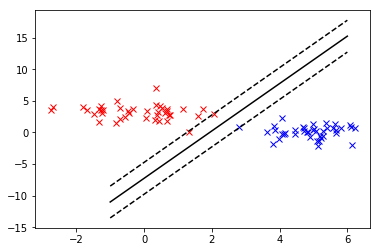

In [4]:
plt.plot(data[:40, 0], data[:40, 1], 'rx')
plt.plot(data[40:, 0], data[40:, 1], 'bx')
plt.plot([-1, 6], [b - k, k * 6 + b], 'k')
plt.plot([-1, 6], [b1 - k, k * 6 + b1], 'k--')
plt.plot([-1, 6], [b2 - k, k * 6 + b2], 'k--')
plt.show()